In [1]:
# Description: This strategy is based on technical indicator 'Moving Average Convergence Divergence (MACD)'
# Appliction method: When the MACD line crosses above the signal line, and when MACD is above 0,
# the code generates a buy signal and when MACD crosses below, generates a sell signal
# NOTE: This code is generalised so as to take any stock of choice. TATAMOTORS(NSE) has been taken as example here.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = yf.download('TATAMOTORS.NS', interval='1d', period='5y')
df.reset_index(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-18,257.750000,259.799988,250.600006,251.500000,250.718582,11554420
1,2018-09-19,253.550003,255.000000,251.000000,252.600006,251.815170,7845650
2,2018-09-21,255.050003,257.700012,228.850006,250.350006,249.572159,18547453
3,2018-09-24,250.199997,251.000000,239.350006,240.199997,239.453690,8889259
4,2018-09-25,241.000000,243.500000,235.449997,240.800003,240.051834,9030367
...,...,...,...,...,...,...,...
1231,2023-09-12,638.000000,639.000000,615.250000,620.799988,620.799988,12541377
1232,2023-09-13,621.000000,628.500000,619.549988,625.900024,625.900024,6988358
1233,2023-09-14,628.099976,630.799988,623.299988,624.599976,624.599976,5722295
1234,2023-09-15,628.700012,636.500000,627.150024,634.250000,634.250000,18917805


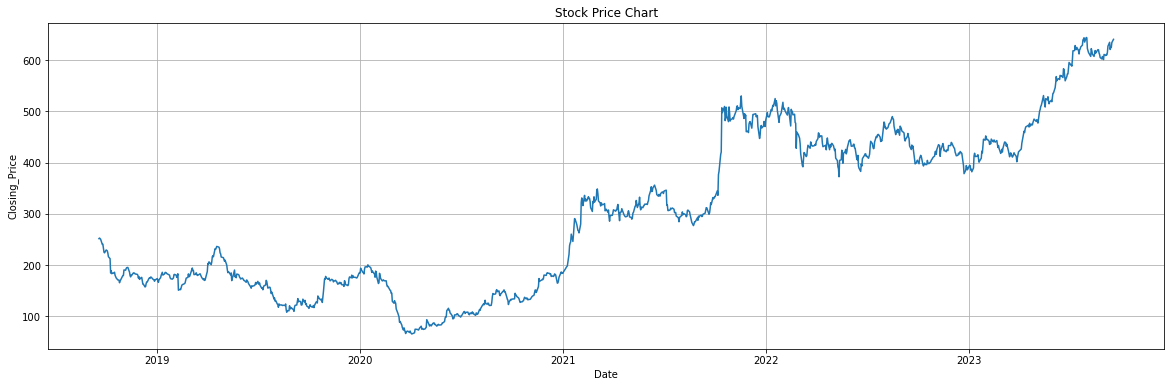

In [4]:
# Plotting price chart for the stock

plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing_Price')
plt.title('Stock Price Chart')
plt.grid(True)

In [5]:
# Constructing the MACD indicator 

df['12EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12EMA'] - df['26EMA']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


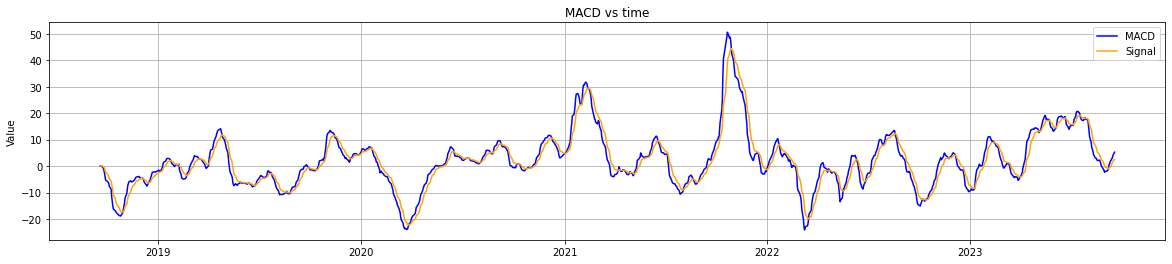

In [6]:
# plotting MACD for visualisation

plt.figure(figsize=(20,4))
plt.plot(df['Date'], df['MACD'], color='blue', label='MACD')
plt.plot(df['Date'], df['Signal'], color='orange', label='Signal')
plt.ylabel('Value')
plt.title('MACD vs time')
plt.grid(True)
plt.legend()


In [7]:
# Generating buy and sell signals based on the strategy

df['Trade'] = np.where((df['MACD'] > df['Signal']) & (df['MACD'] > 0), 1, 0)
df['Position'] = df['Trade'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where((df['Position'] == -1) | ((df.index == len(df)-1) & (df['Trade'] == 1)), df['Close'], np.NAN)

In [8]:
# Trading Data

Buy_Trades = df['Buy'].dropna().reset_index(drop=True)
Sell_Trades = df['Sell'].dropna().reset_index(drop=True)
Trades = pd.DataFrame({'Buy': Buy_Trades, 'Sell': Sell_Trades})
Trades['Win/Lose'] = np.where(Trades['Sell'] > Trades['Buy'], 1, 0)
Trades['P/L'] = Trades['Sell'] - Trades['Buy']
Trades['Cumulative P/L'] = Trades['P/L'].cumsum()
Trades

,Buy,Sell,Win/Lose,P/L,Cumulative P/L
0,252.600006,250.350006,0,-2.250000,-2.250000
1,183.050003,175.399994,0,-7.650009,-9.900009
2,182.850006,150.699997,0,-32.150009,-42.050018
3,177.350006,182.250000,1,4.899994,-37.150024
4,202.949997,215.600006,1,12.650009,-24.500015
5,127.900002,119.900002,0,-8.000000,-32.500015
6,139.500000,167.050003,1,27.550003,-4.950012
7,176.699997,176.149994,0,-0.550003,-5.500015
8,183.699997,182.550003,0,-1.149994,-6.650009
9,192.000000,191.399994,0,-0.600006,-7.250015


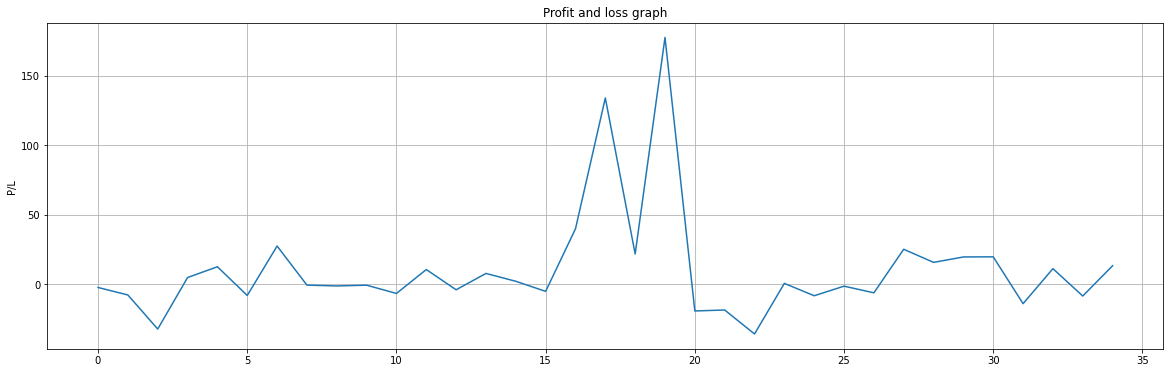

In [9]:
# P/L graph

plt.figure(figsize=(20,6))
plt.plot(Trades.index, Trades['P/L'])
plt.ylabel('P/L')
plt.title('Profit and loss graph')
plt.grid(True)

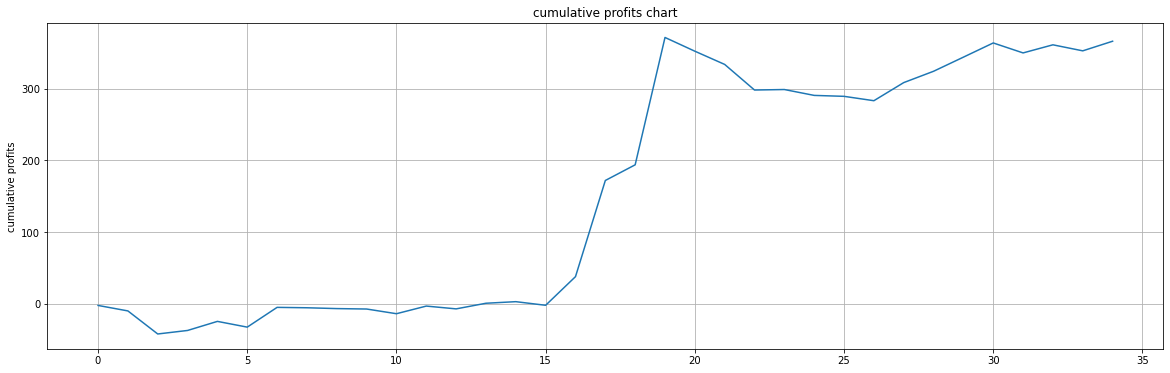

In [10]:
# Cumulative profits chart

plt.figure(figsize=(20,6))
plt.plot(Trades.index, Trades['Cumulative P/L'])
plt.ylabel('cumulative profits')
plt.title('cumulative profits chart')
plt.grid(True)

In [11]:
# Statistics

time_frame_yrs = len(df) / 252
avg_share_price = np.mean(df['Close'])
profit_per_share = np.sum(df['Sell']) - np.sum(df['Buy'])
returns = profit_per_share / avg_share_price
cagr = (returns + 1) ** (1 / time_frame_yrs) - 1
avg_annual_returns = cagr * 100
win_percent = (np.sum(Trades['Win/Lose']) / len(Trades))*100
lose_percent = 100 - win_percent

In [12]:
avg_share_price

300.52678027970893

In [13]:
profit_per_share

366.1999816894531

In [14]:
cagr

0.17640505626599712

In [15]:
avg_annual_returns

17.64050562659971

In [16]:
win_percent

48.57142857142857

In [17]:
lose_percent

51.42857142857143